# 任务一：数据探索性分析（EDA）
### 目录
- 1.什么是EDA?
- 2.EDA的主要内容
- 3.以二手车交易数据为例进行EDA
    - 3.1 载入数据
    - 3.2 数据总览
    - 3.3 查看数据的缺失、异常和同一性情况
    - 3.4 查看数据的分布

# 1.什么是EDA?

所谓的EDA(Exploratory Data Analysis),就是数据的探索性分析。简单来说就是看看数据长啥样：数据的类型是什么，范围是多少，分布是什么，有没有异常值等等。那么，为什么要进行数据的探索性分析呢？原因可能有以下几点：

**（1）了解数据的统计特征**


现在是所谓的“大数据”时代，数据量非常之大。但是，并不是所有的数据都适合直接用来做预测的。比如有一些数据在收集的过程由于各种原因，产生了大量的缺失值，或者有大量的异常值，如果直接将这些数据用于模型训练，产生的结果可能并不好。还有的数据可能会分布得很不均匀，例如，一个类别变量共有3个类别，但是95%以上的数据都集中在其中的一个类别，那么这种变量的区分度可能就不是很好。因此，为了更好地利用这些数据，我们首先要对这些数据有一个很好的认识。


**（2）了解自变量与因变量之间的关系**


直观来说，如果一个自变量与因变量之间的相关系数很高，那么我们自然而然地会认为这个自变量对因变量的预测可能会带来帮助。因此，数据探索性分析可以给我们一个直观的感受，哪些变量可能会是重要的。


**（3）探索自变量之间的关系**


以经典的线性回归为例，一个非常值得注意的问题是“多重共线性”的问题。多重共线性问题是指自变量之间的相关性非常高，这会造成参数的方差“膨胀”，使得t统计量被低估，该显著的变量不显著了。因此，为了减缓多重共线性问题，在建模之前，要探索自变量之间的相关性，为之后的特征工程打下基础。


# 2.EDA的一般内容和步骤

EDA的一般步骤包括：


（1）数据总览


（2）缺失值和异常值分析


（3）观察数据的分布
- 对于类别变量，观察取值的多少以及每个取值所占的频率，可以通过画箱线图、柱状图等可视化的方法来了解数据的分布
- 对于连续变量，可以通过画直方图，求偏度、峰度等来观察变量的分布，时间序列还可以折线图观察走势。


（4）观察数据的相关性
- 可以通过求两两之间的相关系数，画图等方法探索数据的相关性

# 3.以二手车交易价格为例进行EDA
下面以二手车交易数据集为例，进行数据的探索性分析


## 3.1 载入数据

In [16]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [2]:
# 导入数据
path = 'C:/python_temp'
Train_data = pd.read_csv(path + '/data/used_car_train_20200313.csv',sep=' ')
Test_data = pd.read_csv(path + '/data/used_car_testA_20200313.csv', sep=' ')

## 3.2 数据总览

- 1.通过info()，我们可以看到数据集有多少个变量，变量的类型,数据缺失情况等信息

- 2.通过describe()，看描述性统计信息

- 3.通过head()和tail()来看数据的具体情况


通过这些分析，我们知道以下信息：
- 训练集共有150000个样本，30个变量，其中1个是我们要预测的因变量price，即汽车价格。测试集共有5000个样本，除了没有因变量之外，其他的自变量与训练集相同
- 有一些变量含有缺失值


**字段表**


这个字段表是举办方给出的

* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】

In [3]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [4]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [5]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [6]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [8]:
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [9]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


## 3.3 查看数据的缺失、异常和同一性情况


**缺失情况查看**
- 1.通过isnull()判断是否缺失，再用sum()加总即可只变量的缺失数量，可进一步加工成缺失比例，如果缺失比例小则可视情况采取填充的方法

- 2.一般情况下看确实比例即可大致了解数据的缺失情况，但为了更直观地观察，可以使用missingno模块进行可视化，这里不进行介绍了


**数据的同一性**:数据的同一性简单来说就是看数据的众数占比，如果一个变量的众数占比极高，比如达到了90%以上，则这个变量的区分性可能也不是很好，因此有必要统计一下变量的众数占比
- 用value_counts()来统计取值的占比

**异常情况查看**

- 1.首先可以通过info()查看数据的类型
- 2.可以通过箱线图等方式查看，这里留到下一节查看数据的分布介绍

In [12]:
data_null_rate = pd.DataFrame()
data_null_rate['null rate(%)'] = (Train_data.isnull().sum()/Train_data.isnull().count())*100

In [13]:
data_null_rate

,null rate(%)
SaleID,0.000000
name,0.000000
regDate,0.000000
model,0.000667
brand,0.000000
bodyType,3.004000
fuelType,5.786667
gearbox,3.987333
power,0.000000
kilometer,0.000000


In [14]:
test_data_null_rate = pd.DataFrame()
test_data_null_rate['null rate(%)'] = (Test_data.isnull().sum()/Test_data.isnull().count())*100

In [15]:
test_data_null_rate

,null rate(%)
SaleID,0.000
name,0.000
regDate,0.000
model,0.000
brand,0.000
bodyType,2.826
fuelType,5.786
gearbox,3.820
power,0.000
kilometer,0.000


In [104]:
# 统计众数占比
def count_mode(data):
    result = pd.DataFrame()
    result['mode'] = None
    result['mode_rate'] = None   
    columns = data.columns
    for column in columns:
        result.loc[column,'mode'] = Train_data[column].value_counts(ascending=False).index[0]
        result.loc[column, 'mode_rate'] = Train_data[column].value_counts(ascending=False).iloc[0]/Train_data.shape[0]
    return result
result = count_mode(Train_data)
result

,mode,mode_rate
SaleID,2047,6.66667e-06
name,708,0.00188
regDate,20000008,0.0012
model,0,0.0784133
brand,0,0.209867
bodyType,0,0.276133
fuelType,0,0.61104
gearbox,0,0.744153
power,0,0.0855267
kilometer,15,0.645847


In [106]:
# 可以将统计缺失值和众数的表放在一起
# 统计众数和缺失值占比
def count_mode(data):
    result = pd.DataFrame()
    result['null rate(%)'] = (data.isnull().sum()/data.isnull().count())*100
    columns = data.columns
    for column in columns:
        result.loc[column,'mode'] = Train_data[column].value_counts(ascending=False).index[0]
        result.loc[column, 'mode_rate(%)'] = Train_data[column].value_counts(ascending=False).iloc[0]/Train_data.shape[0]*100
    return result
result = count_mode(Train_data)
result


,null rate(%),mode,mode_rate(%)
SaleID,0.000000,2047,0.000667
name,0.000000,708,0.188000
regDate,0.000000,2e+07,0.120000
model,0.000667,0,7.841333
brand,0.000000,0,20.986667
bodyType,3.004000,0,27.613333
fuelType,5.786667,0,61.104000
gearbox,3.987333,0,74.415333
power,0.000000,0,8.552667
kilometer,0.000000,15,64.584667


可以看出有些变量比如seller和offerType只有一个取值，则用于建模的意义不大

In [109]:
# 通过info()看数据的异常情况
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

notRepairedDamage为object类型，具体查看一下

In [110]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可发现有一个取值为-，为了便于建模，我们把-替换为null

In [111]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

## 3.4 数据的分布

**类别变量**


- 1.用unique()和value_counts()来查看数据取值的情况
- 2.用类别特征箱形图、小提琴图、柱状图等可视化

**连续变量**
- 1.求偏度和峰度
- 2.画分布图
- 3.相关性分析


In [112]:
# 先手动划分类别变量和连续变量
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [113]:
# 1.查看数据取值情况
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [114]:
# 2.类别变量箱线图
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

In [115]:
# 用MISSING替换None
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')


In [116]:
# 定义画箱线图的函数
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

In [117]:
#df.melt() 则是将宽数据集变成长数据集
f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)


C:\Users\WANGQ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


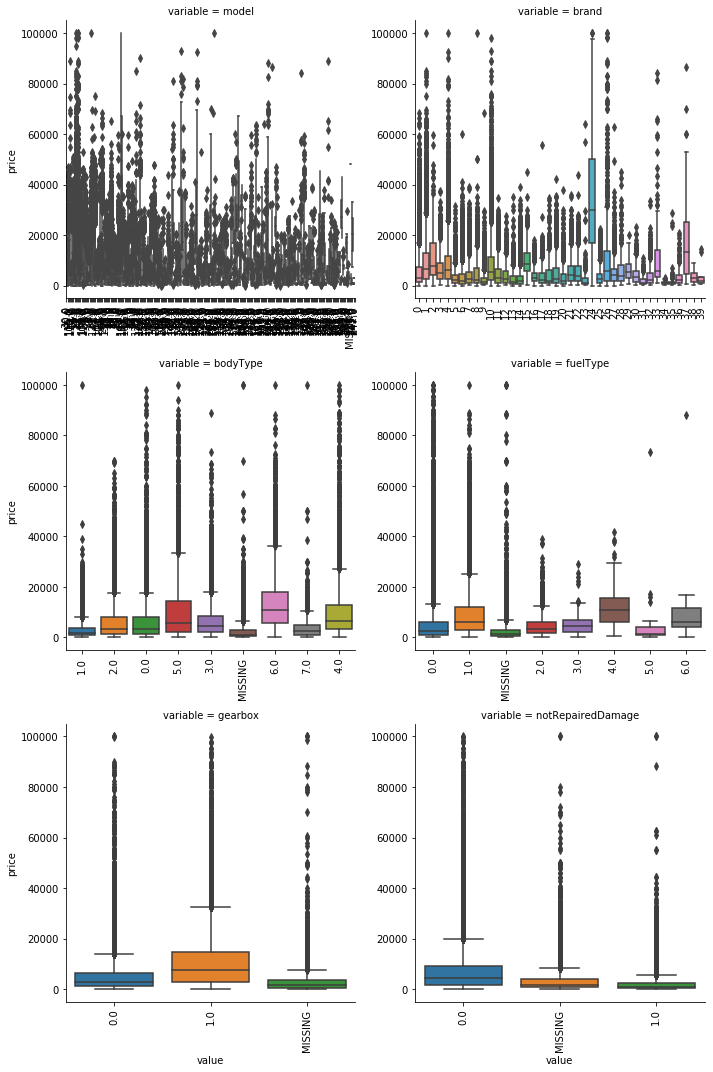

In [119]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

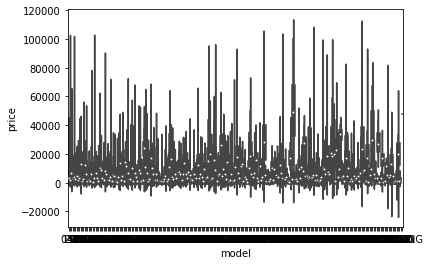

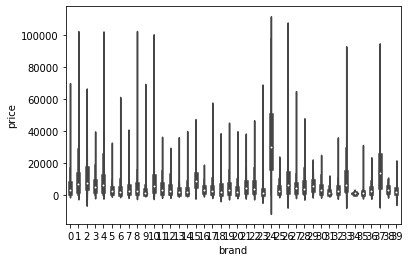

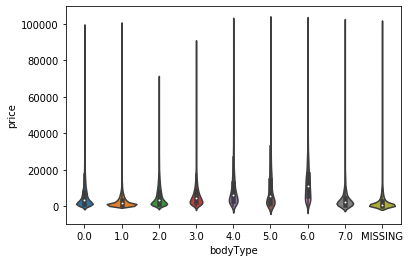

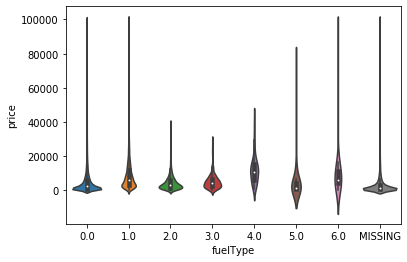

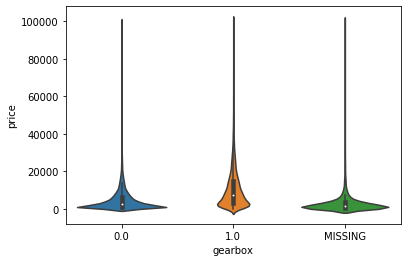

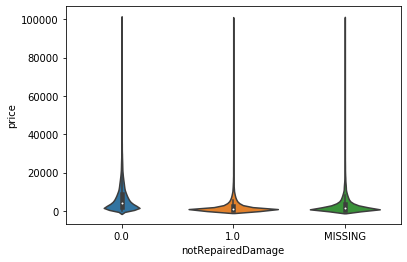

In [120]:
# 3,类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

C:\Users\WANGQ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


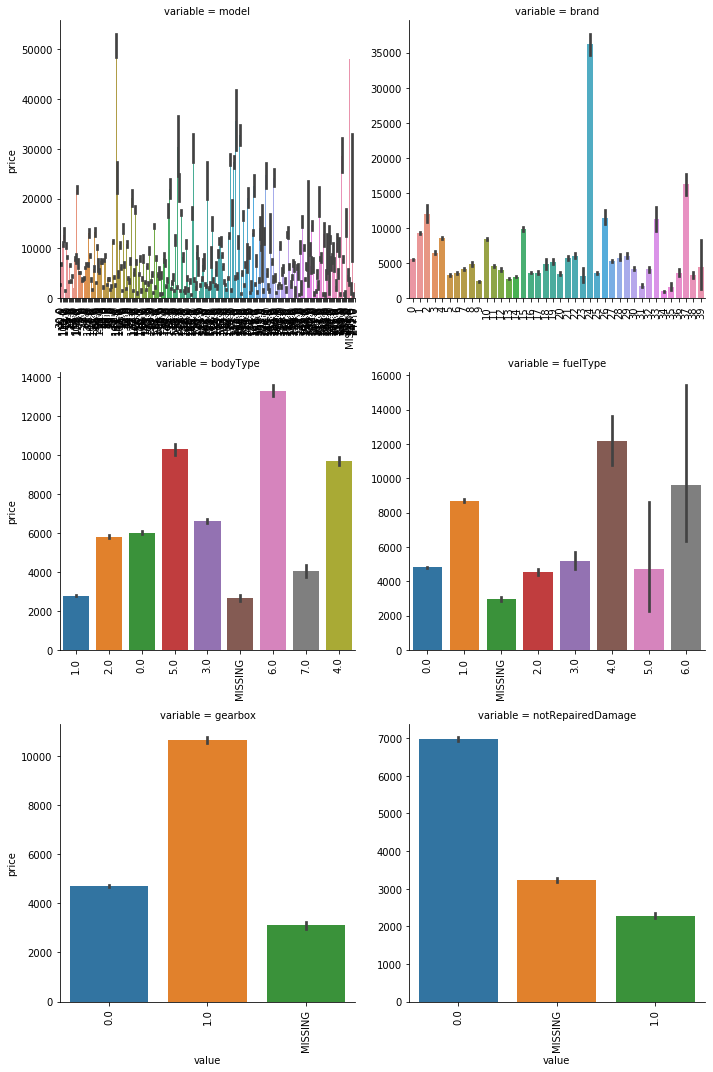

In [121]:
## 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

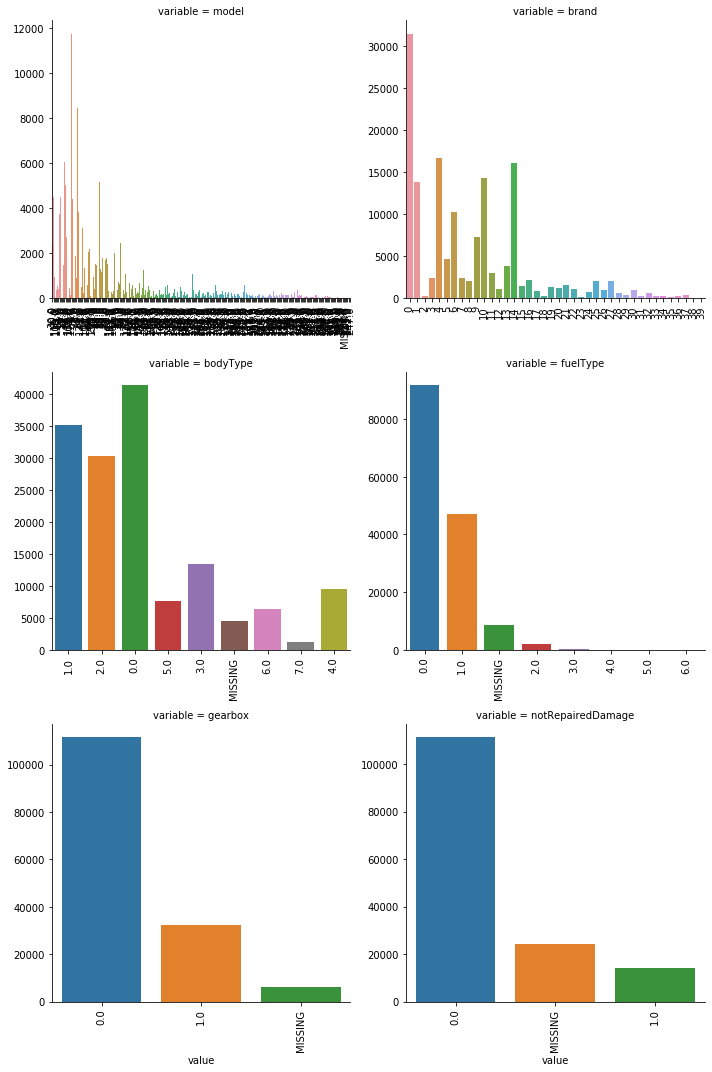

In [122]:
## 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")


**连续变量**

In [123]:
## 1.查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39


In [125]:
## 2.与因变量的相关性分析
numeric_features.append('price')
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



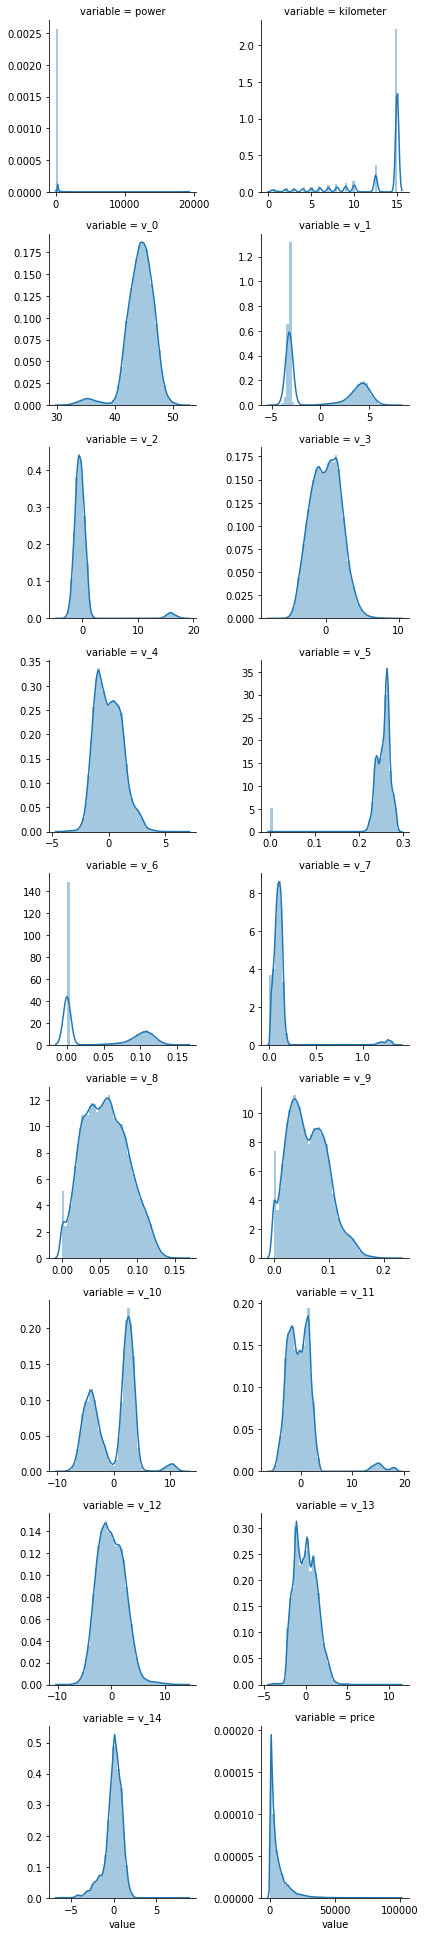

In [126]:
## 3.分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

C:\Users\WANGQ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


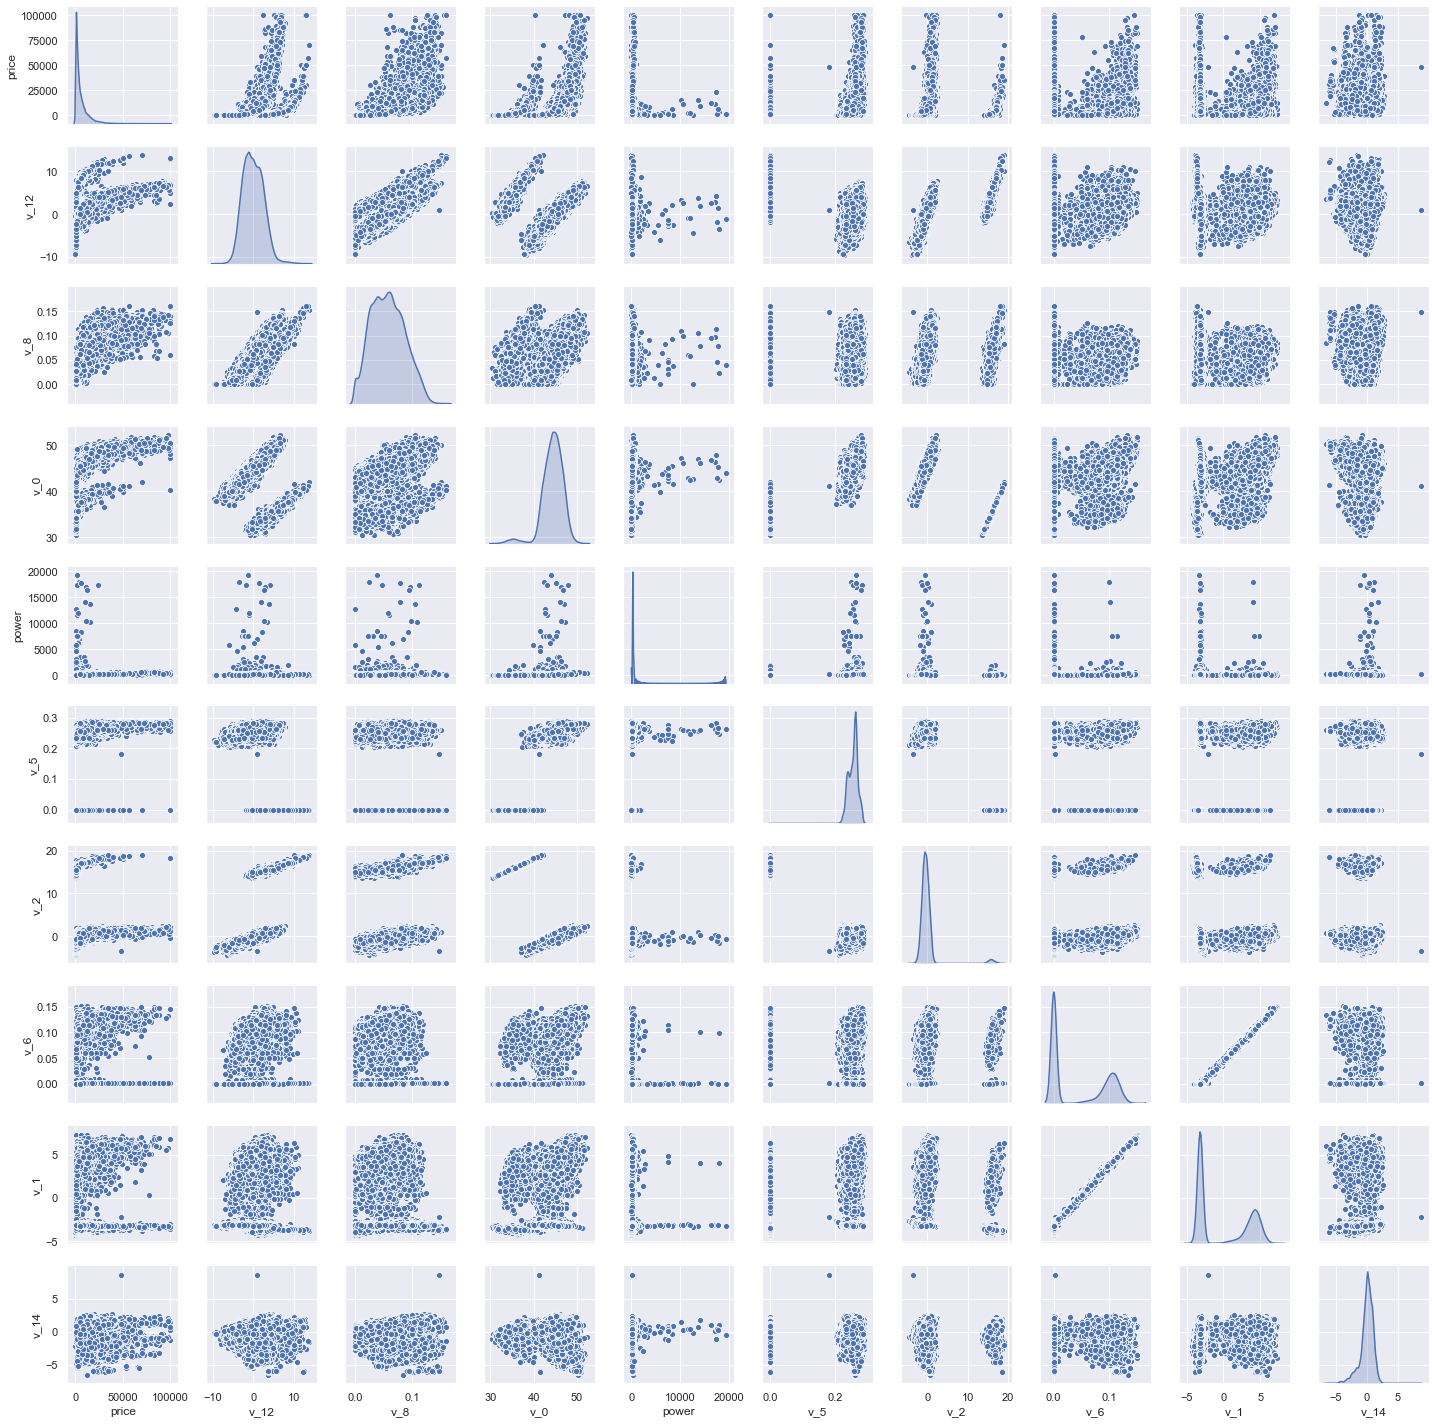

In [127]:
## 4.变量两两相关性
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [128]:
# 直接生成可视化报告
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")


ModuleNotFoundError: No module named 'pandas_profiling'

还没有安装哦......